In [1]:
import os, inspect, sys
import numpy as np
#currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = '/home/trxw/Documents/ML/rl-quantum-gates/ml-q-channel-all/modular/cp/trappedionsqsim/'
sys.path.insert(0,parentdir) 
from trappedionsqsim.utils.simulations import Simulation as simulation
import matplotlib.pyplot as plt
import qutip as qtp

In [2]:
#Initialize Simulation instance 
t1, t2, t3, t4 = 0.,10., 20., 30.

N = 10000
t_arr1 = np.linspace(t1, t2, N)
t_arr2 = np.linspace(t2, t3, N)
t_arr3 = np.linspace(t3, t4, 2*N)


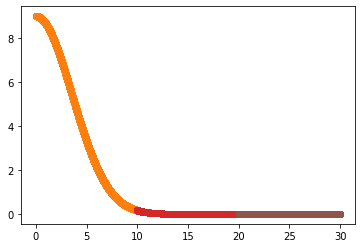

In [3]:
#With splines

func = lambda t: 9*np.exp(-(t / 5)** 2)

noise_amp = 0.0
noisy_func = lambda t: func(t)+(noise_amp*func(t))*np.random.randn(t.shape[0])
#noisy_func2 = lambda t: func2(t)+(noise_amp*func2(t))*np.random.randn(t.shape[0])

noisy_data1 = noisy_func(t_arr1)
noisy_data2 = noisy_func(t_arr2)
noisy_data3 = noisy_func(t_arr3)

plt.plot(t_arr1, func(t_arr1))
plt.plot(t_arr1, noisy_data1, 'o')
plt.plot(t_arr2, func(t_arr2))
plt.plot(t_arr2, noisy_data2, 'o')
plt.plot(t_arr3, func(t_arr3))
plt.plot(t_arr3, noisy_data3, 'o')

plt.show()

In [4]:
#Test Simulation with Cubic Spline:


sim = simulation(1, 2, 1, 10)
psi0 = sim.ket([0], [2])
sim.set_curr_state(psi0)
a  = sim.a(1)
sm = sim.sm(1)
c_ops = []
H0 = 2 * np.pi * a.dag() * a + 2 * np.pi * sm.dag() * sm + 2 * np.pi * 0.25 * (sm * a.dag() + sm.dag() * a)   
H1 = sim.sx(1)


#### First Simulation Stage 
S1 = qtp.interpolate.Cubic_Spline(t_arr1[0], t_arr1[-1], noisy_data1)
H = [[H0*sim.sy(1), '1.'], [H1, S1] ]#, [H1, '10 * exp(-(t / 5) ** 2)']]
output1 = sim.evolve_spline(H, t_arr1)#, c_ops, [])

#### Second Simulation stage
S2 = qtp.interpolate.Cubic_Spline(t_arr2[0], t_arr2[-1], noisy_data2)
H = [[H0*sim.sy(1), '1.'], [H1, S2] ]#, [H1, '10 * exp(-(t / 5) ** 2)']]
output2 = sim.evolve_spline(H, t_arr2)#, c_ops, [])

#### Second Simulation stage
S3 = qtp.interpolate.Cubic_Spline(t_arr3[0], t_arr3[-1], noisy_data3)
H = [[H0*sim.sy(1), '1.'], [H1, S3] ]#, [H1, '10 * exp(-(t / 5) ** 2)']]
output3 = sim.evolve_spline(H, t_arr3)#, c_ops, [])



t_arr is set
Checking time step in time-evolution:
Transition matrix element after first time-step:  0j
Checking time step in time-evolution:
Transition matrix element after first time-step:  0.0
No c_ops, using sesolve
10.0%. Run time:   0.13s. Est. time left: 00:00:00:01
20.0%. Run time:   0.24s. Est. time left: 00:00:00:00
30.0%. Run time:   0.35s. Est. time left: 00:00:00:00
40.0%. Run time:   0.47s. Est. time left: 00:00:00:00
50.0%. Run time:   0.58s. Est. time left: 00:00:00:00
60.0%. Run time:   0.84s. Est. time left: 00:00:00:00
70.0%. Run time:   0.95s. Est. time left: 00:00:00:00
80.0%. Run time:   1.06s. Est. time left: 00:00:00:00
90.0%. Run time:   1.17s. Est. time left: 00:00:00:00
Total run time:   1.27s
t_arr is set
Checking time step in time-evolution:
Transition matrix element after first time-step:  (0.000211018071597879+0.00027185807530960104j)
Checking time step in time-evolution:
Transition matrix element after first time-step:  9.219128914714785e-05
No c_ops, us

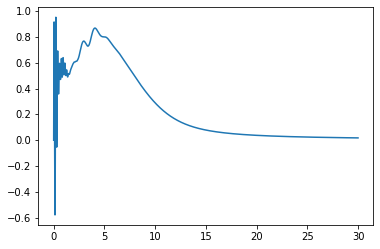

In [7]:
plt.plot(sim.time_arr, qtp.expect(sim.sx(1), sim.states_list) )
plt.show()

In [6]:
len(sim.time_arr), len(sim.states_list)

(39998, 39998)